<a href="https://colab.research.google.com/github/pallavi-allada/UtteranceClassification/blob/main/src/EDA_Utterance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os as os

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string, re

from sklearn.model_selection import train_test_split

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/Colab Notebooks/Cognizer"
DATA_DIR = "data"
MODEL_DIR = "models"

CSV_FILE = "utterance_id.csv"

TRAIN_CSV = "train.csv"
TEST_CSV = "test.csv"

BALANCED_TRAIN_CSV = "balanced_train.csv"
BALANCED_TEST_CSV = "balanced_test.csv"

First view of data dimensions - shape and some samples - head


In [ ]:
dataset = pd.read_csv(os.path.join(ROOT_DIR, DATA_DIR, CSV_FILE))
dataset.shape

(4597, 3)

There are 4597 records with 3 columns.


In [ ]:
dataset.head()

,Unnamed: 0,question,tags
0,0,List email from Richa?,Email
1,1,What did robert write to me regarding overview...,Email
2,2,When was the Diwali Celeberation?,Email
3,3,Show me all emails focused on covid19.,Email
4,4,Show me the important mails for today,Email


There are 2 columns of interest - question and tags. Let's check for data distribution across tags column.


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4597 entries, 0 to 4596
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4597 non-null   int64 
 1   question    4597 non-null   object
 2   tags        4597 non-null   object
dtypes: int64(1), object(2)
memory usage: 107.9+ KB


We are good with the data, as it doesnt have null features/columns. No need of imputation. Dropping the Unnamed: 0 column as its of no use.

In [ ]:
dataset.drop(["Unnamed: 0"], axis=1, inplace=True)

In [ ]:
dataset.tags.value_counts()

Contract    1590
Email       1162
Calendar     786
Contact      450
Document     398
Employee     126
Keyword       85
Name: tags, dtype: int64

In [ ]:
def bar_plot(values, title = '', label_tick = 0):
    sns.barplot(x=values.index, y=values)
    plt.xlabel(values.name)
    plt.ylabel('Count')
    
    plt.xticks(rotation=label_tick)
    plt.title(title)

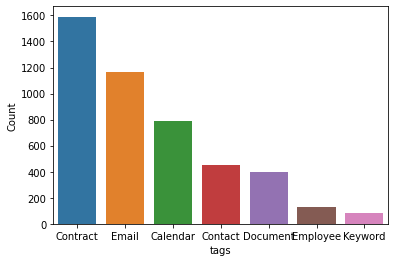

In [ ]:
bar_plot(dataset.tags.value_counts())

There is an imbalance in the data. Let's try using the data as-is and also generate synthetic data(upsampling) by random-insertion or SMOTE techniques. Downsampling is not a good idea here as data provided itself is very limited.

Let's try checking the word cloud to see what words are predominant in each class/tag.


In [ ]:
#convert tag to label
def tag2label(tag):
  return (0 if tag == "Contract" else (1 if tag == "Email" else (2 if tag == "Calendar" else (3 if tag == "Contact" else (4 if tag == "Document" else (5 if tag == "Employee" else 6))))))

#convert label to tag
def label2tag(lbl):
  return ("Contract" if lbl == 0 else ("Email" if lbl == 1 else ("Calendar" if lbl == 2 else ("Contact" if lbl == 3 else ("Document" if lbl == 4 else ("Employee" if lbl == 5 else "Keyword"))))))

#Create column with label from tags column
dataset["label"] = dataset["tags"].apply(tag2label)

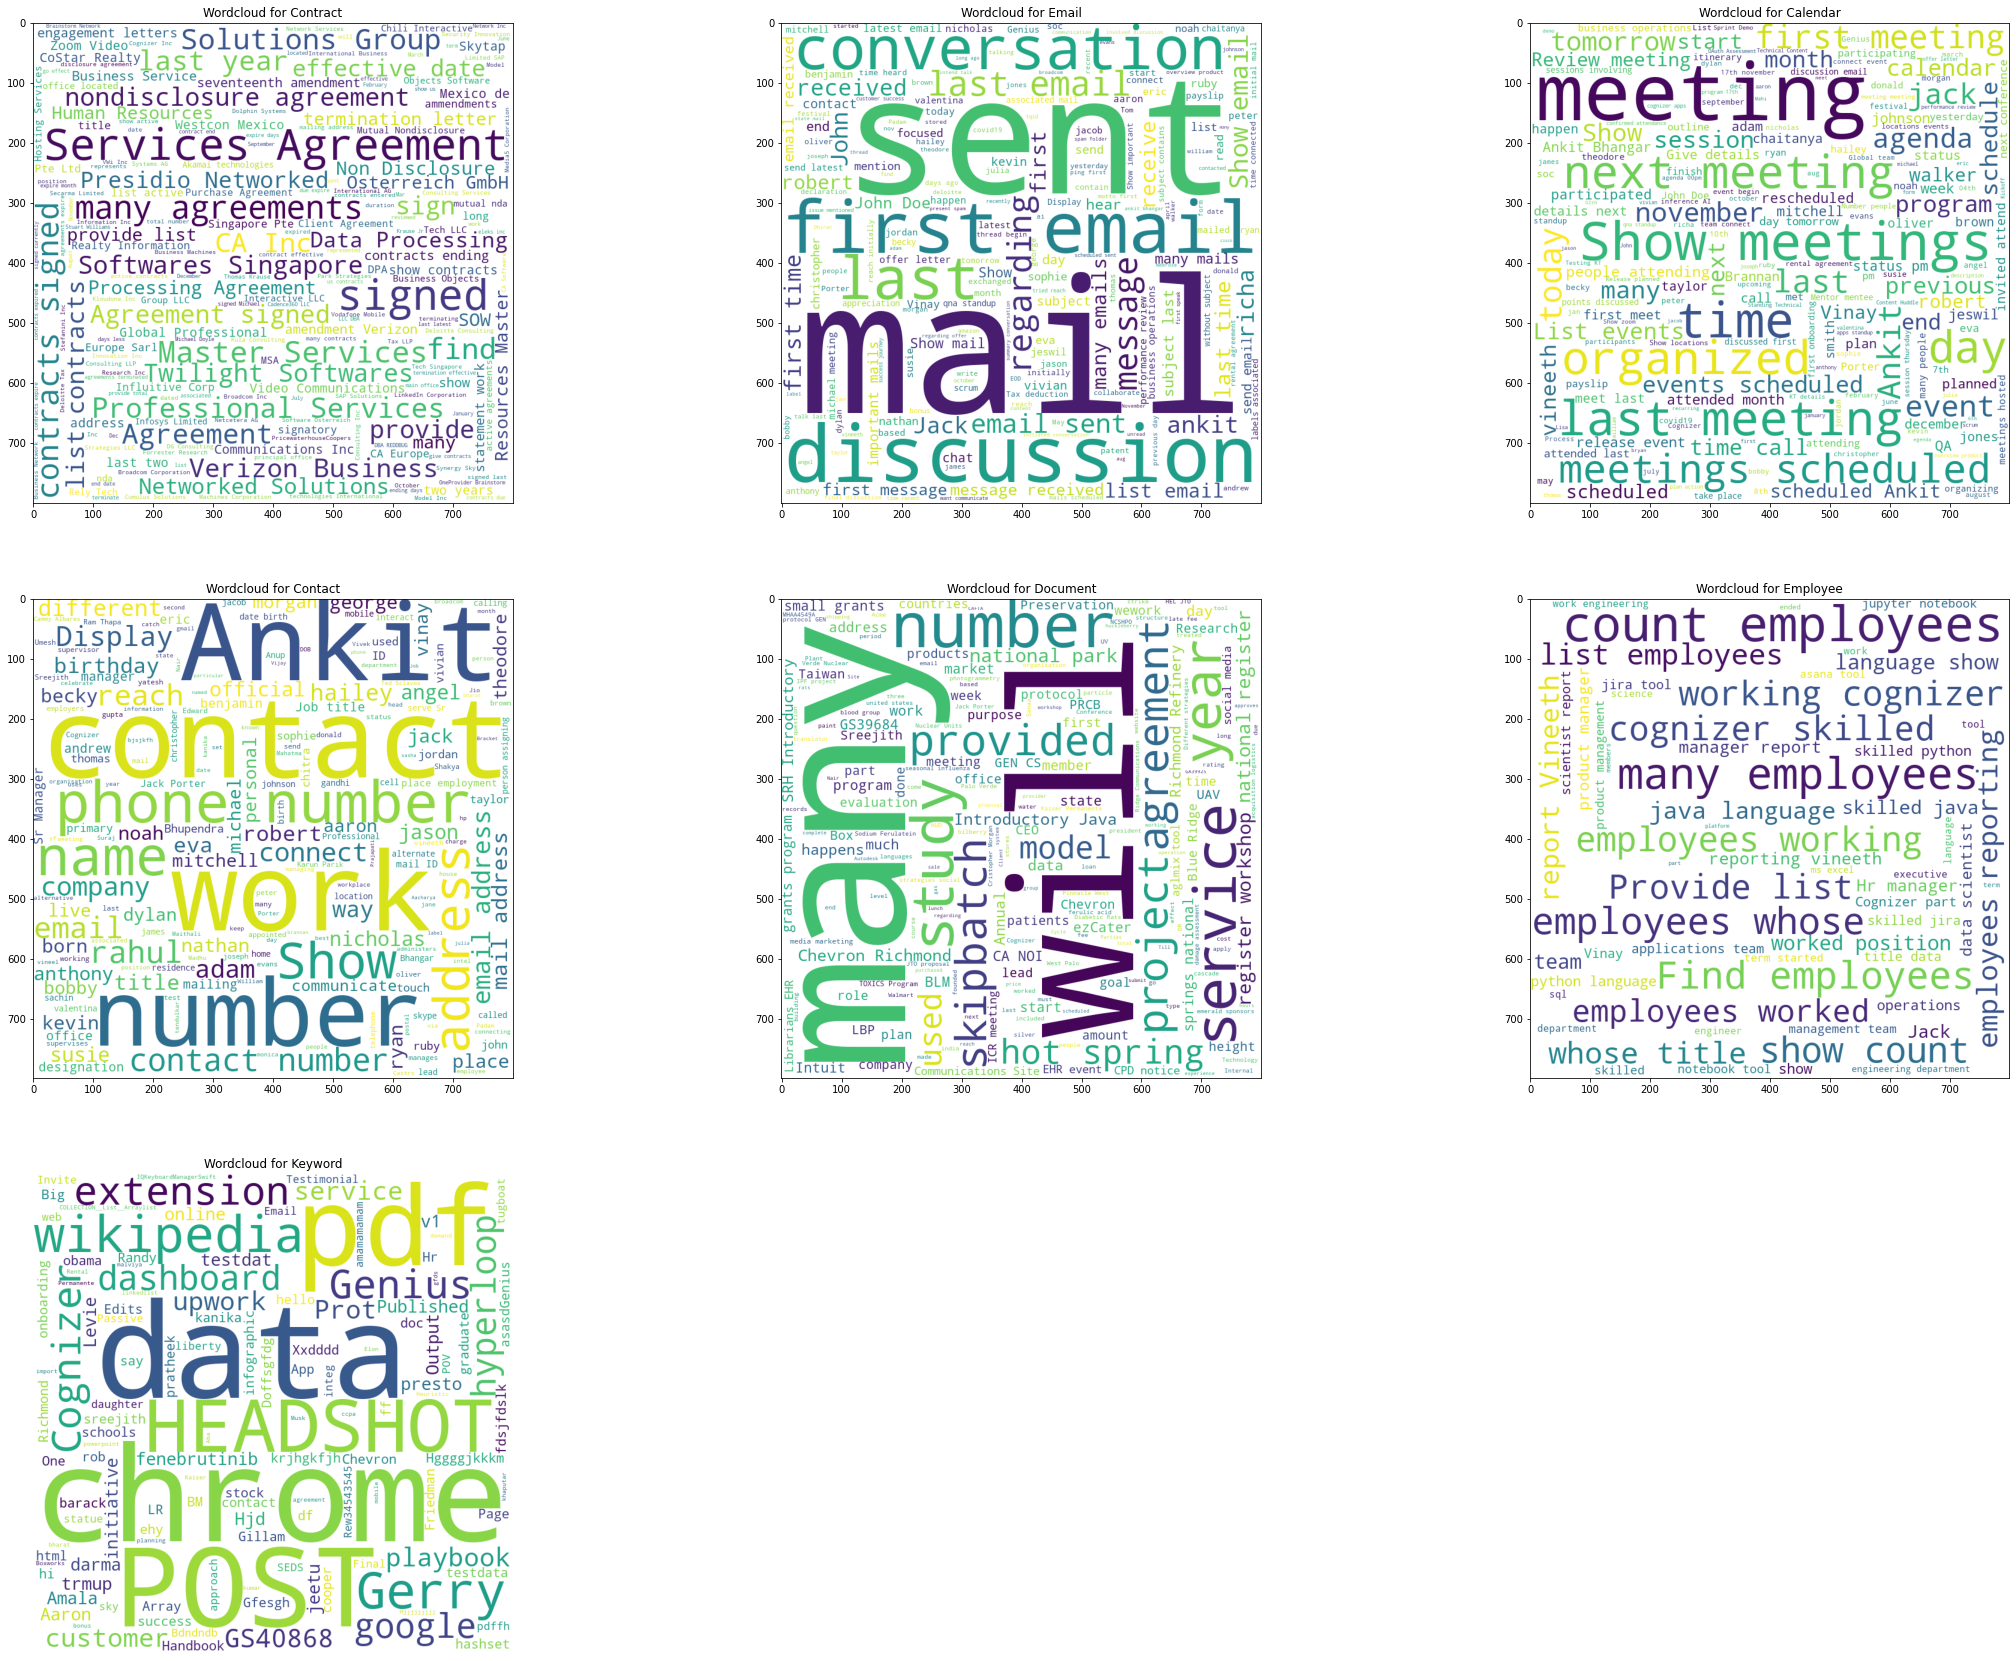

In [ ]:
plt.figure(figsize = (38, 30), facecolor = None)

for i in range(0,7):
  sentences = " ".join(dataset[dataset.label == i]['question'])
  wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 5).generate(sentences)

  plt.subplot(3,3,i+1)
  plt.imshow(wordcloud)
  plt.title("Wordcloud for "+label2tag(i))

plt.axis("off")
plt.show()

Interesting !! Some of the words like "email" appear in clouds for Contact and Email, "number" appears in both Document and Contact. 

Likewise,, if we go through Keyword cloud there seems to be noise (scratching my head!!) like Hjd, krjhgkfjh, Xxdddd, Hggggjkkkm, fdsjfdlk. Should we ignore the keyword class, and proceed with just 6 classes? 

Let's split the data into train and test and write to 2 different files.


In [ ]:
# dataset.reset_index(inplace=True)
train_dataset, test_dataset = train_test_split(dataset,test_size = 0.10,random_state = 42, stratify=dataset["label"])
train_dataset.drop(columns=["index"], inplace=True)
test_dataset.drop(columns=["index"], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_dataset.shape, test_dataset.shape

((4137, 3), (460, 3))

In [ ]:
train_dataset.label.value_counts(), test_dataset.label.value_counts() 

(0    1431
 1    1046
 2     707
 3     405
 4     358
 5     113
 6      77
 Name: label, dtype: int64, 0    159
 1    116
 2     79
 3     45
 4     40
 5     13
 6      8
 Name: label, dtype: int64)

In [ ]:
train_dataset.head()

,question,tags,label
4326,What are some services offered by Autodesk?,Document,4
3056,Who is benjamin ?,Contact,3
3009,How do I contact Mum?,Contact,3
1757,when was the Human Resources Master Services A...,Contract,0
1642,what is the validity period for a Human Resour...,Contract,0


In [ ]:
train_dataset.to_csv(os.path.join(ROOT_DIR,DATA_DIR,TRAIN_CSV), index=False)
test_dataset.to_csv(os.path.join(ROOT_DIR,DATA_DIR,TEST_CSV), index=False)